In [2]:
from google.colab import files

In [4]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"redyrr","key":"71953c20b5c0bf95a80e7d23010ffa3f"}'}

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [7]:
!kaggle datasets download -d mexwell/motorbike-marketplace

  0% 0.00/1.78M [00:00<?, ?B/s]
100% 1.78M/1.78M [00:00<00:00, 164MB/s]


In [8]:
!mkdir motorbike-marketplace
!unzip /content/motorbike-marketplace.zip -d motorbike-marketplace
!ls motorbike-marketplace

Archive:  /content/motorbike-marketplace.zip
  inflating: motorbike-marketplace/europe-motorbikes-zenrows.csv  
europe-motorbikes-zenrows.csv


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [12]:
df = pd.read_csv("/content/motorbike-marketplace/europe-motorbikes-zenrows.csv")
df.head()

,price,mileage,power,make_model,date,fuel,gear,offer_type,version,link
0,23990,150,218.0,Honda,03/2020,Gasoline,Manual,Demonstration,CBR1000RR-R Fireblade SP,/offers/honda-others-cbr1000rr-r-fireblade-sp-...
1,7500,2871,90.0,BMW F 800 GT,09/2018,Gasoline,Manual,Used,NaN,/offers/bmw-f-800-gt-gasoline-white-f65273c6-6...
2,800,1700,3.0,Nova Motors Retro Star,10/2019,Gasoline,NaN,Used,NaN,/offers/nova-motors-retro-star-gasoline-red-f8...
3,14990,24345,NaN,Aprilia RSV4,03/2016,Gasoline,NaN,Used,RF,/offers/aprilia-rsv4-rf-gasoline-silver-1b51fe...
4,6200,25000,128.0,Kawasaki Ninja ZX-6R,08/2009,Gasoline,NaN,Used,NaN,/offers/kawasaki-ninja-zx-6r-gasoline-blue-2f8...


In [13]:
cdf=df.fillna(df.mean())
cdf.head(10)

<ipython-input-13-81ef791ee564>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  cdf=df.fillna(df.mean())


,price,mileage,power,make_model,date,fuel,gear,offer_type,version,link
0,23990,150,218.000000,Honda,03/2020,Gasoline,Manual,Demonstration,CBR1000RR-R Fireblade SP,/offers/honda-others-cbr1000rr-r-fireblade-sp-...
1,7500,2871,90.000000,BMW F 800 GT,09/2018,Gasoline,Manual,Used,NaN,/offers/bmw-f-800-gt-gasoline-white-f65273c6-6...
2,800,1700,3.000000,Nova Motors Retro Star,10/2019,Gasoline,NaN,Used,NaN,/offers/nova-motors-retro-star-gasoline-red-f8...
3,14990,24345,206.157598,Aprilia RSV4,03/2016,Gasoline,NaN,Used,RF,/offers/aprilia-rsv4-rf-gasoline-silver-1b51fe...
4,6200,25000,128.000000,Kawasaki Ninja ZX-6R,08/2009,Gasoline,NaN,Used,NaN,/offers/kawasaki-ninja-zx-6r-gasoline-blue-2f8...
5,1500,3000,1.000000,Aprilia Mojito 50,07/2010,Gasoline,NaN,Used,NaN,/offers/aprilia-mojito-50-gasoline-black-9283e...
6,10500,1,71.000000,Suzuki V-Strom 650,12/2021,Gasoline,NaN,Pre-registered,XT ABS DL 650 XT,/offers/suzuki-v-strom-650-xt-abs-dl-650-xt-ga...
7,8500,13000,105.000000,Yamaha MT-09,05/2018,Gasoline,NaN,Used,NaN,/offers/yamaha-mt-09-gasoline-blue-ab3bb425-ad...
8,2000,19000,15.000000,Kymco Super Dink 125,10/2016,Gasoline,NaN,Used,NaN,/offers/kymco-super-dink-125-gasoline-grey-67c...
9,8250,6400,126.000000,Yamaha MT-09,06/2019,Gasoline,NaN,Used,NaN,/offers/yamaha-mt-09-gasoline-grey-936ab0c6-48...


In [14]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34917 entries, 0 to 34916
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       34917 non-null  int64  
 1   mileage     34917 non-null  int64  
 2   power       34917 non-null  float64
 3   make_model  34917 non-null  object 
 4   date        34917 non-null  object 
 5   fuel        31727 non-null  object 
 6   gear        12847 non-null  object 
 7   offer_type  34917 non-null  object 
 8   version     17413 non-null  object 
 9   link        34917 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 2.7+ MB


<Axes: >

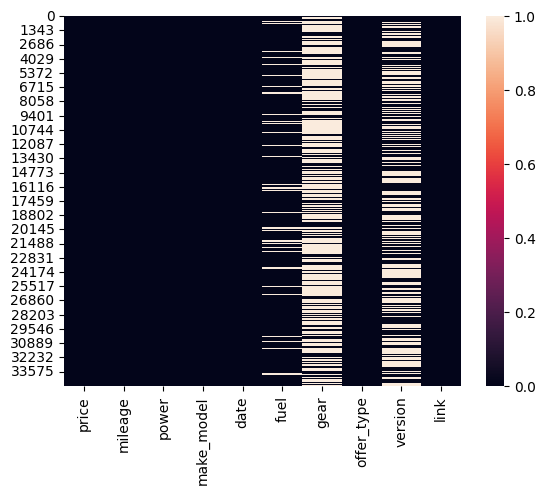

In [15]:
sns.heatmap(cdf.isnull())

In [16]:
cdf.describe()

,price,mileage,power
count,3.491700e+04,3.491700e+04,34917.000000
mean,4.568532e+04,2.183175e+04,206.157598
std,4.850120e+06,2.059421e+05,8481.129548
min,1.000000e+00,0.000000e+00,1.000000
25%,6.999000e+03,2.932000e+03,60.000000
50%,9.920000e+03,1.100000e+04,107.000000
75%,1.259000e+04,2.500000e+04,165.000000
max,8.888889e+08,9.999999e+06,913595.000000


<ipython-input-17-2e041ddfc6db>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cdf.corr(), annot=True)


<Axes: >

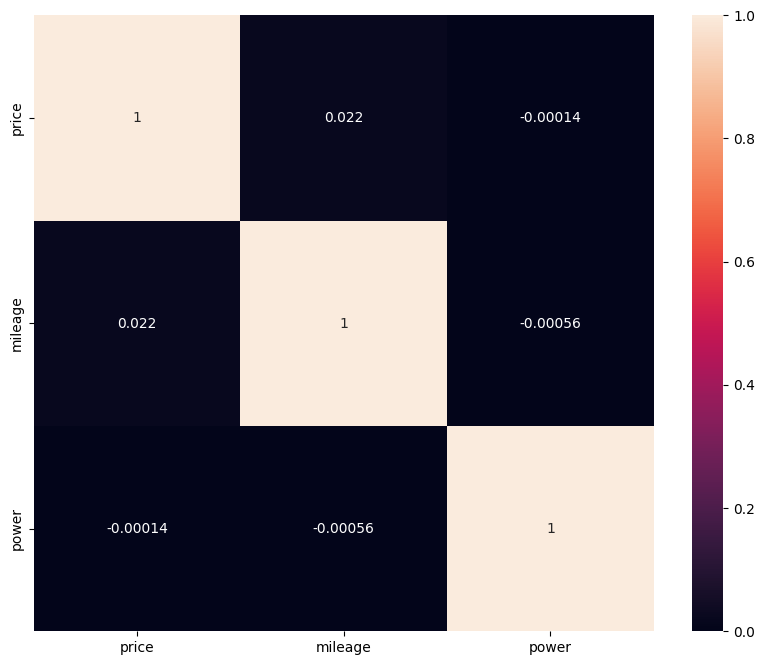

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(cdf.corr(), annot=True)

In [18]:
models = cdf.groupby('make_model').count()[['price']].sort_values(by='price', ascending=True).reset_index()
models = models.rename(columns={'price':'numberOfMotorbike'})

(array([   0,    1,    2, ..., 2165, 2166, 2167]),
 [Text(0, 0, 'Keeway Goccia 50'),
  Text(1, 0, 'Kawasaki ZZR 600'),
  Text(2, 0, 'Zündapp ZA 25'),
  Text(3, 0, 'Keeway Hurricane'),
  Text(4, 0, 'Keeway RY8'),
  Text(5, 0, 'Keeway SWAN'),
  Text(6, 0, 'Keeway Silverblade'),
  Text(7, 0, 'Kreidler Dice'),
  Text(8, 0, 'Kreidler Florett 50'),
  Text(9, 0, 'Kreidler Flory 25'),
  Text(10, 0, 'Kreidler Flory 50'),
  Text(11, 0, 'Kreidler Jigger 50'),
  Text(12, 0, 'Kreidler Supermoto 50'),
  Text(13, 0, 'Kumpan Electric 1953'),
  Text(14, 0, 'Kumpan Electric 54iconic'),
  Text(15, 0, 'Kymco Agility 300'),
  Text(16, 0, 'Kymco Bet & Win 125'),
  Text(17, 0, 'Kymco Bet & Win 150'),
  Text(18, 0, 'Kymco Grand Dink 50'),
  Text(19, 0, 'Kymco Like 150'),
  Text(20, 0, 'Kymco MXU 150'),
  Text(21, 0, 'Kymco MXU 250'),
  Text(22, 0, 'Kymco MXU 400'),
  Text(23, 0, 'Kymco MXU 450i'),
  Text(24, 0, 'Kymco MXU 50'),
  Text(25, 0, 'Kymco MXU 500'),
  Text(26, 0, 'Kymco Maxxer 250'),
  Text(27, 0, '

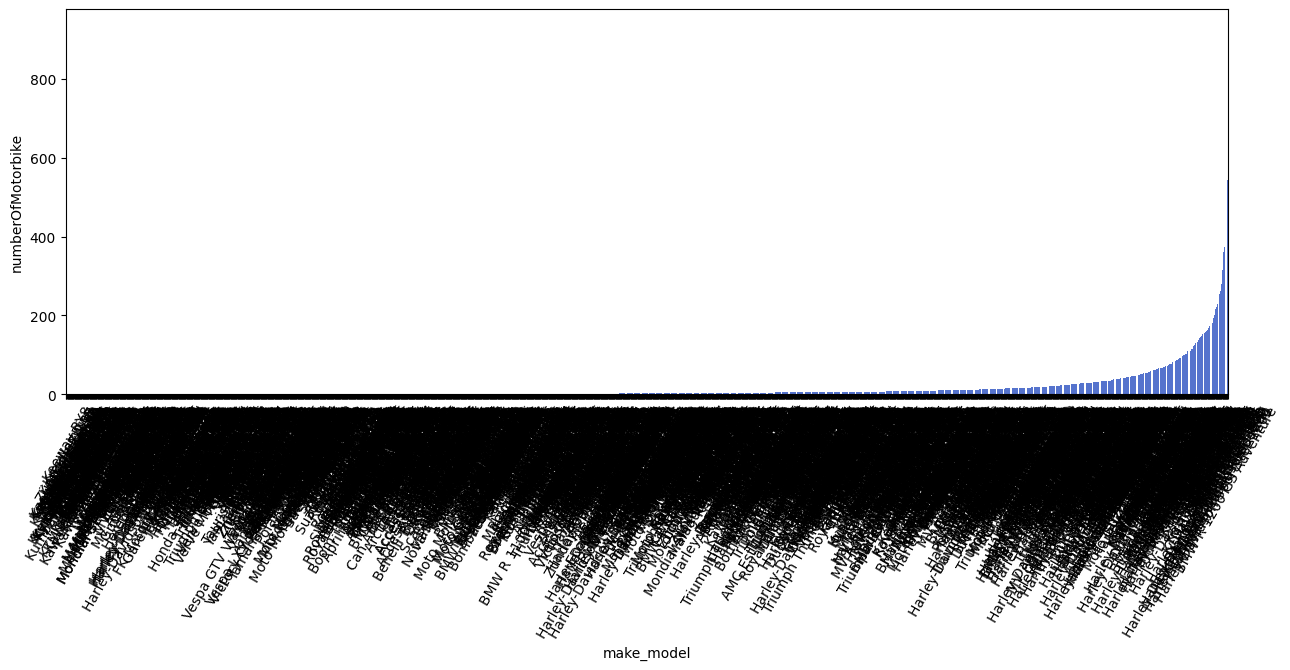

In [19]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=models['make_model'], y=models['numberOfMotorbike'], color= 'royalblue')
plt.xticks(rotation=60)

In [20]:
engine = cdf.groupby('mileage').count()[['price']].sort_values(by='price', ascending=True).reset_index()
engine = engine.rename(columns={'price':'count'})

<Axes: xlabel='mileage', ylabel='count'>

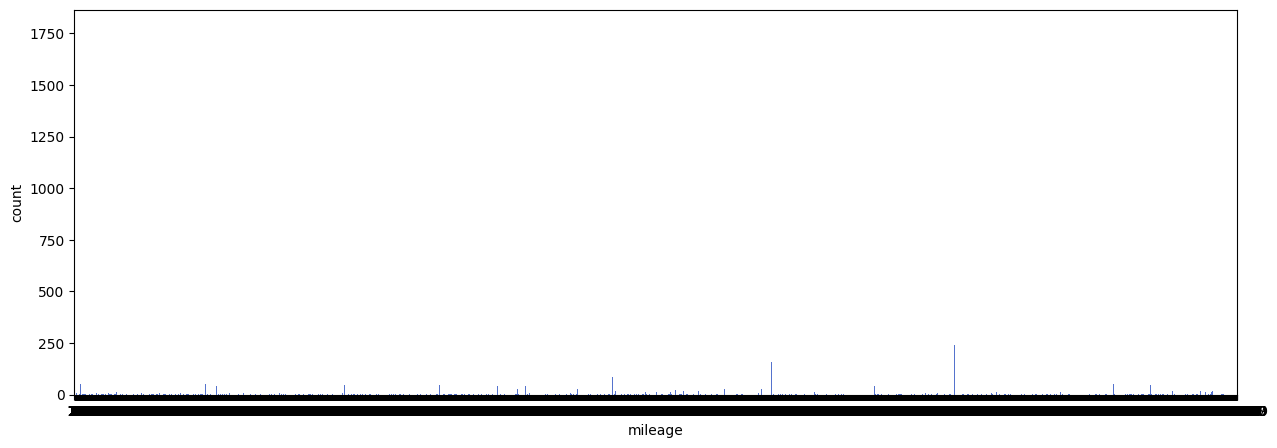

In [21]:
plt.figure(figsize=(15,5))
sns.barplot(x=engine['mileage'], y=engine['count'], color= 'royalblue')

<ipython-input-22-e6c8f43a0dbf>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cdf['price'])


<Axes: xlabel='price', ylabel='Density'>

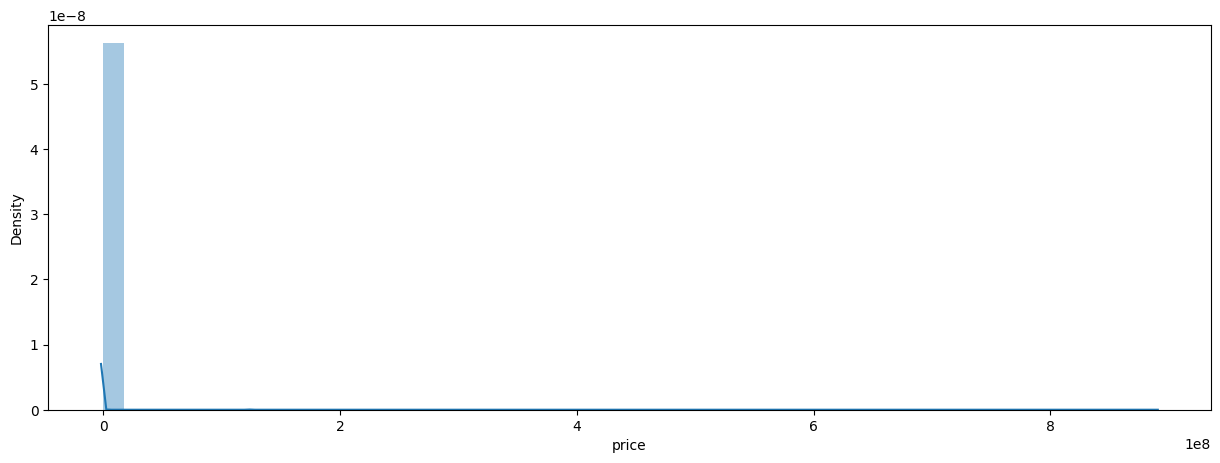

In [22]:
plt.figure(figsize=(15,5))
sns.distplot(cdf['price'])

<ipython-input-23-2a6b9ec9ca56>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cdf['mileage'])


<Axes: xlabel='mileage', ylabel='Density'>

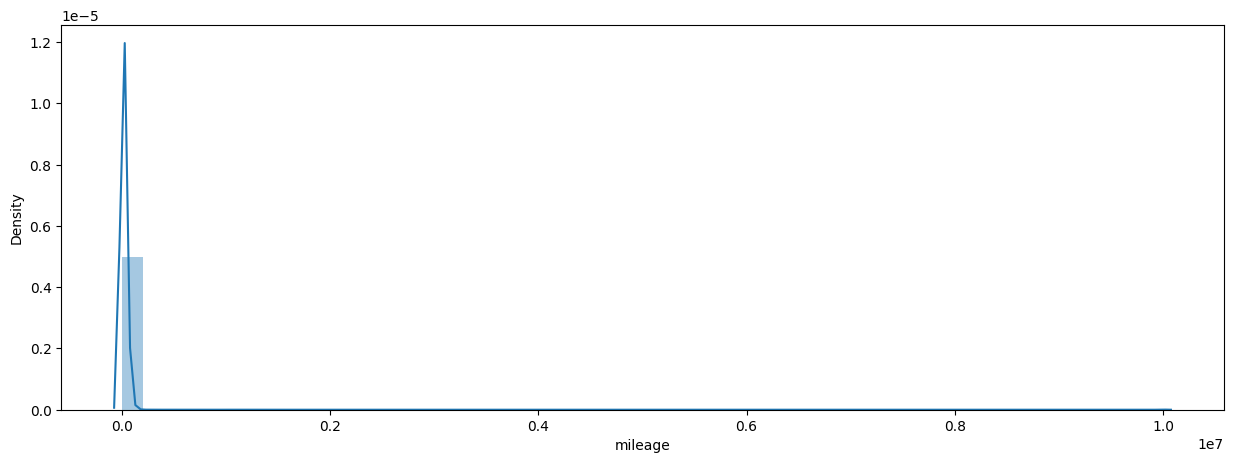

In [23]:
plt.figure(figsize=(15,5))
sns.distplot(cdf['mileage'])

<ipython-input-24-6007cc4bcb23>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cdf['power'])


<Axes: xlabel='power', ylabel='Density'>

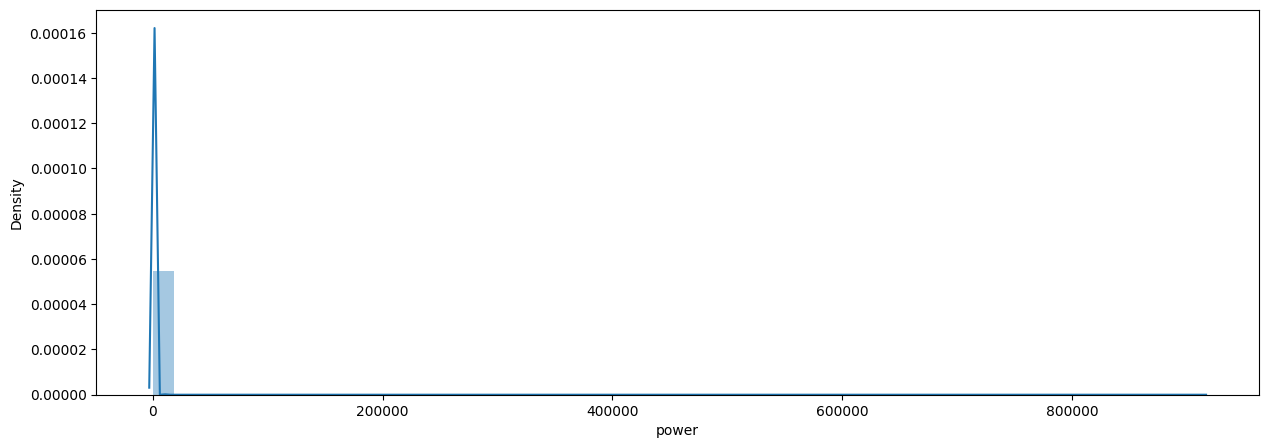

In [24]:
plt.figure(figsize=(15,5))
sns.distplot(cdf['power'])

In [25]:
features = ['price', 'mileage','power']
x = cdf[features]
y = cdf['price']
x.shape, y.shape

((34917, 3), (34917,))

In [26]:
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(8730,)

In [27]:
lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(X_test)

In [161]:
score = lr.score(X_test, y_test)
print('akurasi model regresi linier = ', score)

akurasi model regresi linier =  1.0


In [28]:
input_data = np.array([[23990,150,218.000000	]])

prediction = lr.predict(input_data)
print('Estimasi harga motor dalam EUR :', prediction)

Estimasi harga motor dalam EUR : [23990.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [29]:
import pickle

filename = 'estimasi_motorbike.sav'
pickle.dump(lr,open(filename,'wb'))